# KNN 회귀분석 을 통한 확률확인

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import pandas as pd
fish = pd.read_csv("http://bit.ly/fish_csv_data")
fish.head()

## pd.unique(df[" "]) 유니크 value 종류

In [ ]:
print(pd.unique(fish["Species"]))

* Species 를 target 으로 두고 나머지 column 들을 가지고 모델링

In [ ]:
fish_input = fish[["Weight","Length","Diagonal",'Height', 'Width']].to_numpy()

In [ ]:
fish_target = fish[['Species']].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

* KNN 회귀분석에서 n_neighbors=3 로 해당점 주변 3개의 점을 보고 확률을 확인한다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

* 여기서 `Species`의 순서가 다르다

In [ ]:
print(pd.unique(fish["Species"]))
print(kn.classes_) ## 확률을 확인할때는 이걸 사용한다.

In [2]:
# test_scaled 데이터 knn 모델로 예측
print(kn.predict(test_scaled[:5]))

NameError: name 'kn' is not defined

## kn.predict_proba() 확률 출력

In [3]:
# target을 확정한 확률에 대한 출력
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4)) #소수점 4번째 자리까지 표기
print(kn.classes_) # 각 확률의 순서는 kn.classes_ 에서 나온것과 같다 (오름차순)

NameError: name 'kn' is not defined

In [4]:
# test_scaled 데이터의 3번째 데이터의 가장 가까운 3개의 데이터
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])
# 이 3개의 데이터를 확인하고 가장 확률이 높은 것을 반환

NameError: name 'kn' is not defined

---
# 로지스틱 회귀 (logistic regression)

$z = a \times (Weight) + b \times (Length) + c \times (Diagonal) + d \times (Height) + e \times (Width) + f$

* 여기서 a, b, c, d, e 는 가중치, 계수
* 다중 회귀를 위한 선형방정식과 유사
* 확률 값을 가지기 위해서는 z 값이 0~1 사이가 되어야 함
* 즉 z 값이 아주 큰 음수에서 -1, 아주 큰 양수에서 1 이되게한다.

**`시그모이드 함수(sigmoid function)`, `로지스틱 함수(logistic function)`** 를 사용한다

## 시그모이드 함수(sigmoid function) 그리기

## np.arange(-5,5,0.1) 범위 np리스트 만들기

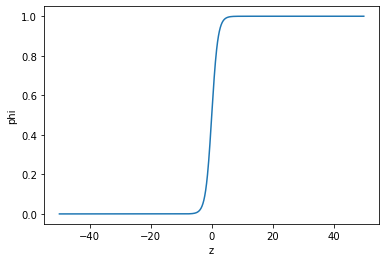

In [5]:
import numpy as np
import matplotlib.pyplot as plt
z= np.arange(-50, 50, 0.1)
phi = 1 / (1+ np.exp(-z))
plt.plot(z, phi)
plt.xlabel("z")
plt.ylabel("phi")
plt.show()

* numpy array에 True, False 를 비교해서 True만을 출력할 수 있다.

In [6]:
char_arr = np.array(["a","b","c","d","e"])
print(char_arr)
print(char_arr[[True, False, True, False, False]])

['a' 'b' 'c' 'd' 'e']
['a' 'c']


* 이 방식을 이용해서 특정데이터를 담고있는 행만 출력할수있다.

bream(도미), smelt(빙어) 행 출력

In [7]:
bream_smelt_indexes =  (train_target == "Bream") | (train_target == "Smelt")
# bream 이거나 smelt 이면 True 인 array 만들기
bream_smelt_indexes[:10]

NameError: name 'train_target' is not defined

In [8]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

NameError: name 'train_target' is not defined